# AMOEBA

In this file we are going to develop the AMOBA algorithm *(HIERARCHICAL CLUSTERING BASED ON SPATIAL PROXIMITY USING DELAUNATY DIAGRAM)*  for clustering using the Hierachical Geo Clustering, the name is because "*reproduce*" like an amoeba. 


In [1]:
#hide
import os
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from HierarchicalGeoClustering.TreeClusters import *
from HierarchicalGeoClustering.Clustering import *

The **AMOEBA** algorithm is oresented on *AMOEBA: HIERARCHICAL CLUSTERING BASED ON SPATIAL PROXIMITY USING DELAUNATY DIAGRAM* by **Vladimir Estivill-Castro** and **Ickjai Lee**. The article is available [here](https://vladestivill-castro.net/teaching/kdd.d/readings.d/tr99-05.pdf) The idea in the AMOEBA algorithm is to find the hierachical tree structure presented in the georeference data  like the way is done in or article. 

So let try to find out how the AMOEBA is constructed. 


The algorithm use the edges in the delanuy triangulation to see if the points are attracted or repulse betweeen each other, the atraction and repultion of the points are based on the Delaunay triangulation edges. First the Delaunay triangulation is obtained, the edges are clasified into two groups edges of interest and not interesting edges. The interesting edges would be the sort ones and the not interesting would be the ones that are too long. So the not interest edges could be remove by using son threshold the mean could be use but this would lead us to some issus regarding not able to detect some not dense clusters. Therefore the edges in the Delaunay triangulation are divided into four categories, the edges that are inside a cluster, the edges between clusters , the edges between cluster and noise and the edges between noise points. The edges that should be remove at certain level include all edges between the cluster and noise, all edges between noise points and some edges between clusters. So how the clasiffication of the edges is done will be an importan part of the AMOEBA algorithm. 

### Parenthesis 

As far I understand the algorithm uses a stadistical clasiffication on the edges, the idea is that the edges between noise points tend to be longer than the mean, the clusters edges lenght are small. But not all the clusters has the same density, the cluster that are more dense tend to have shorter edges than not dense clusters, so if we look at the distribution of the lenght of the edges inside clusters, is actually sum of distributions. This is the reason why is not a good idea to use only the mean as the threshold.

### End Parenthesis

The mean lenght of the edges adyacent to a point (local mean) is going to be helpful to identify if the point is noise, is inside the cluster, or is a point consider border of a cluster. The inner points will have a small local mean since all the adyacent edges will be inside a cluster, the noise point will have a large local mean, and the local mean of the point in the border points will be close to the global mean. The *Noise Index* defines as 

$$
NI(p)= \frac{\text{Local mean}}{\text{Global mean}}
$$

is a good way to identify what type of point is. So the AMOEBA algorithm calculates a tolerance value that combines the standard devation and the noise index. The tolerance value is defined as follows:
$$
TP(p) = \frac{\text{Standar deviation}}{NI(p)}
$$

So the cut of value is the sum of the global mean and the tolerance value:

$$
F(p)= \text{Global mean}+ T(p)
$$

So in each level of hierarchy the edges greater or equal to $F(p)$ are remove and the edges less thah the function valu are keep. The edges that keep pass to the nex level fo detecting clusters. 






The following definitions are from the article and will allow us to understand how the **AMOEBA** algorithm is constructed.

* *Pasive Edge*: A Delaunay  edge which is greater than or equal to the criterion function $F(p)$ at a certain level. Passive edges are removed from the proximity graph, since they are not of interest any more. Thus, they are no longer used for further clustering.

* *Active Edge*: A Delaunay edge that is less than the criterion function $F(p)$ at a certain level. Active edges and points incident to them form a new proximity graph in each level of hierarchy. The newly created proximity graph is a subgraph of the previous graph and is used for detecting sub-clusters.

* *Active Path*: A path in the current proximity graph where every edge in the path is an active edge.


* *Cluster*: A set of points connected by active paths in the same level. Alternatively, If there exists an active path between a pair of points, the pair belongs to the same cluster.

* *Noise*: A point that has no active edge incident to itself. In other words, all edges incident to noise are passive edges.

* *Passive Cluster*: A cluster where there still exists an active path between any pair of points in the cluster after another further AMOEBA’s splitting process. An AMOEBA splitting process is the classification into interesting (formally active edges) and non-interesting (passive edges). Passive clusters are the leaves of the clustering hierarchy because their points are in one connected component before and after the AMOEBA’s binary fission. Actually, because of the statistical considerations in AMOEBA, there is no  large difference among the strength of interactions amongst points in passive clusters; i.e. the splitting process does not generate meaningful sub-clusters. Thus, no further binary fission is required for passive clusters.

* *Active Cluster*: A cluster where there does not exist an active path between all pairs of points in the cluster after another further AMOEBA’s split. Here, a luster has significantly varying internal interactions in some sense. The edge split is considered to generate meaningful sub-clusters.

In [2]:
#### create the clusters
HGC = TreeClusters(4, random_seed= 124)

In [3]:
HGC.print_structure()

Root
Root    
├── Root_l_0_n_0
│   ├── Root_l_0_n_0_l_1_n_0
│   │   └── Root_l_0_n_0_l_1_n_0_l_2_n_0
│   │       ├── Root_l_0_n_0_l_1_n_0_l_2_n_0_l_3_n_0
│   │       └── Root_l_0_n_0_l_1_n_0_l_2_n_0_l_3_n_1
│   ├── Root_l_0_n_0_l_1_n_1
│   ├── Root_l_0_n_0_l_1_n_2
│   │   ├── Root_l_0_n_0_l_1_n_2_l_2_n_0
│   │   ├── Root_l_0_n_0_l_1_n_2_l_2_n_1
│   │   │   ├── Root_l_0_n_0_l_1_n_2_l_2_n_1_l_3_n_0
│   │   │   └── Root_l_0_n_0_l_1_n_2_l_2_n_1_l_3_n_1
│   │   └── Root_l_0_n_0_l_1_n_2_l_2_n_2
│   │       └── Root_l_0_n_0_l_1_n_2_l_2_n_2_l_3_n_0
│   └── Root_l_0_n_0_l_1_n_3
│       ├── Root_l_0_n_0_l_1_n_3_l_2_n_0
│       │   ├── Root_l_0_n_0_l_1_n_3_l_2_n_0_l_3_n_0
│       │   ├── Root_l_0_n_0_l_1_n_3_l_2_n_0_l_3_n_1
│       │   └── Root_l_0_n_0_l_1_n_3_l_2_n_0_l_3_n_2
│       └── Root_l_0_n_0_l_1_n_3_l_2_n_1
│           ├── Root_l_0_n_0_l_1_n_3_l_2_n_1_l_3_n_0
│           └── Root_l_0_n_0_l_1_n_3_l_2_n_1_l_3_n_1
└── Root_l_0_n_1


In [4]:
HGC.populate_tree(number_per_cluster=40, avoid_intersec= True)

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:96: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return shapely.ops.cascaded_union(keep_triangles)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:377: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  points_cluster_o = [p for p in points_cluster if


/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:689: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  x_points_cluster =[j.x for j in cluster_points  ]
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:690: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  y_points_cluster =[j.y for j in cluster_points  ]


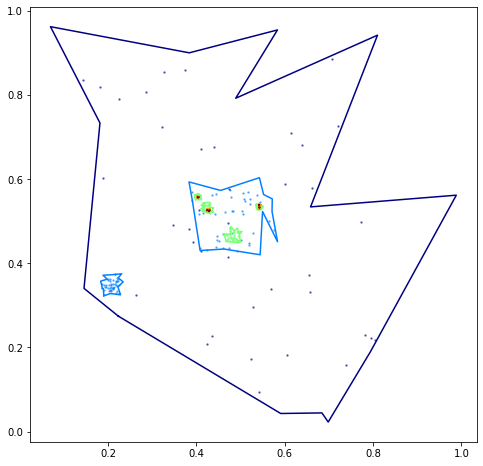

In [5]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.visualize(axs, polygon=True)

In [6]:
### get the delanuay triangulation of the clusters points

original_points= HGC.get_points_tree()
X_2=np.array([[p.x,p.y] for p in original_points])
dic_points={'points':[X_2], 'parent':''}

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:1086: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_points =all_points+[i for i in node.get_points(all_tag = iterative )]


In [7]:
Line_string_seg = get_segments(X_2)

In [8]:
from scipy.spatial import cKDTree, Delaunay
TIN = Delaunay(X_2)
#     # list of coordinates for each edge
#     edges = []
#     for tr in TIN.simplices:
#         for i in range(3):
#             edge_idx0 = tr[i]
#             edge_idx1 = tr[(i+1) % 3]
#             edges.append(LineString((Point(TIN.points[edge_idx0]),
#                                     Point(TIN.points[edge_idx1]))))

#     return edges

In [9]:
TIN.simplices

array([[ 37,  35,   8],
       [ 21,  15,  35],
       [ 35,  19,   8],
       ...,
       [893, 918, 911],
       [893, 911, 892],
       [903, 893, 892]], dtype=int32)

In [10]:
### This is the graph 
edges = []
for tr in TIN.simplices:
    for i in range(3):
        edge_idx0 = tr[i]
        edge_idx1 = tr[(i+1) % 3]
        edges.append((edge_idx0,edge_idx1))

In [11]:
lenght_edges= np.array([i.length for i in Line_string_seg ])
global_edge_mean  =  np.mean(lenght_edges)
global_edge_std = np.std(lenght_edges)

In [12]:

all_remove =[]
all_keep = []
for vert in range(len(TIN.points)):    
    edges_vert = [num_i for num_i, i in enumerate(edges) if i[0] == vert or i[1]== vert ] 
    local_mean = np.mean([ Line_string_seg[i].length for i in edges_vert ])
    tolerance = global_edge_std * (global_edge_mean/local_mean)
    rem_edg_loc = []
    keep_edg_loc = []
    for ed in edges_vert:
        if Line_string_seg[ed].length > tolerance + global_edge_mean:
            rem_edg_loc.append(ed)
        else:
            keep_edg_loc.append(ed)
    all_keep.append(keep_edg_loc)
    all_remove.append(rem_edg_loc)

I think is easier to create the graph to obtain the corresponding subgraph to pass to the next level.



In [13]:
from graph_tool.all import *

In [14]:
g, pos =triangulation(X_2, "delaunay")

In [15]:
g.get_all_edges(0)

array([[ 0, 78],
       [ 0, 75],
       [ 0, 15],
       [ 0, 54],
       [ 0, 41],
       [ 0, 48]])

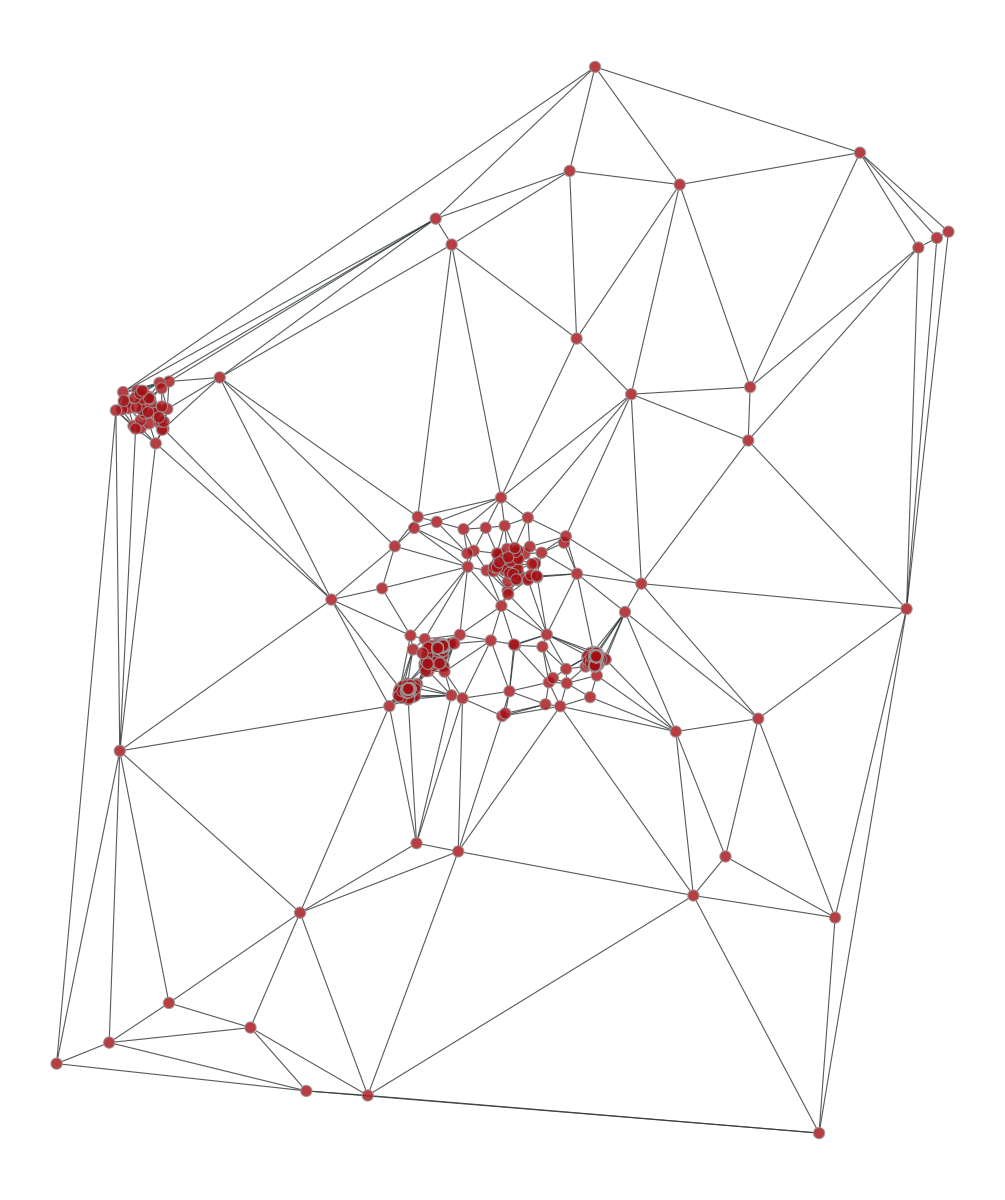

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62450>

In [16]:
graph_draw(g, pos=pos)

Lets do it with the *graph_tool* library, it uses under the hood C++ and cgal and has the *Delaunay* triangulation build in. Also the way it handles the graph in a nice way that will allow us to use only the subgraph. How this will operate on larger set is another issue. 

In [17]:
dis = g.new_edge_property("double")

In [18]:
from scipy.linalg import norm
for e in g.edges():
    dis[e] =  norm(pos[e.target()].a - pos[e.source()].a)
        

In [19]:
g.edge_properties["dis"] = dis
g.vertex_properties["pos"] = pos

In [20]:
pos_g = g.vertex_properties["pos"]

In [21]:
np.mean(g.edge_properties['dis'].get_array())

PropertyArray(0.00873405)

In [22]:
global_edge_mean

0.00829907809372581

The difference between the means I belive is because in the previus triangulation the edges are duplicated and this has an effect in the mean. 

In [23]:
g_global_edge_mean = np.nan_to_num(np.mean(g.edge_properties['dis'].get_array()))

In [24]:
g_global_edge_std = np.nan_to_num(np.std(g.edge_properties['dis'].get_array()))

In [171]:
g.edge_properties['dis'].get_array().mean()

PropertyArray(0.00873405)

In [25]:

all_remove =[]
all_keep = []
for vert in g.vertices():
    g_local_mean= np.mean([g.edge_properties['dis'][vo_edge]  for vo_edge in vert.out_edges()])
    g_tolerance = g_global_edge_std * (g_global_edge_mean/g_local_mean)
    rem_edg_loc = []
    keep_edg_loc = []
    for ed in vert.all_edges():
        if g.edge_properties['dis'][ed] > g_tolerance + g_global_edge_mean:
            rem_edg_loc.append(ed)
        else:
            keep_edg_loc.append(ed)
    all_keep.append(keep_edg_loc)
    all_remove.append(rem_edg_loc)
        
    

In [26]:
vert = find_vertex(g, g.vertex_index, 0)[0]

g_local_mean_0= np.mean([g.edge_properties['dis'][vo_edge] for vo_edge in vert.all_edges()])
g_tolerance_0= g_global_edge_std * (g_global_edge_mean/g_local_mean_0)

In [27]:
### It can be use to be faster 
# g.set_fast_edge_removal(fast=True)
# g.set_fast_edge_removal(fast=False)

In [28]:
# g.get_fast_edge_removal()

In [29]:
# len(g.get_edges())

In [30]:

all_remove_flat= []
for _list in all_remove:
    all_remove_flat += _list

In [31]:

all_keep_flat= []
for _list in all_keep:
    all_keep_flat += _list

With these list we can set a property of level to remove or keep the edge if the  

In [32]:
level_1 = g.new_edge_property("bool", True)
g.edge_properties["level_1"] = level_1

In [33]:
index_rem =[g.edge_index[rem_edge] for rem_edge  in all_remove_flat]
index_keep =[g.edge_index[keep_edge] for keep_edge  in all_keep_flat] 

In [34]:
for i in all_remove_flat:
    g.edge_properties['level_1'][i]= False

In [35]:
for i in all_keep_flat:
    g.edge_properties['level_1'][i]= True

In [36]:
g.set_edge_filter(prop =  g.edge_properties['level_1'])

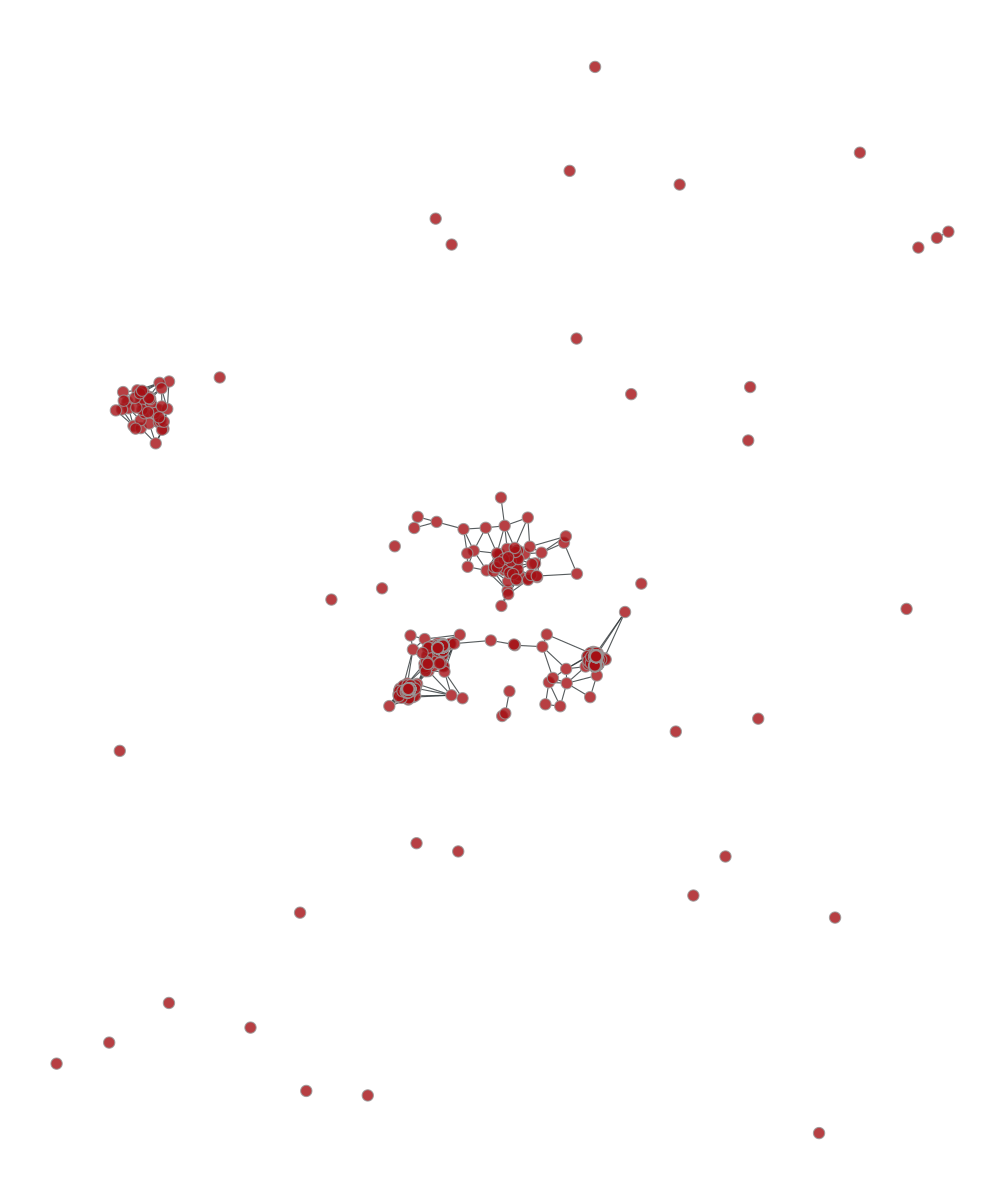

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62450>

In [37]:
graph_draw(g, pos=pos)

In [38]:
g.set_edge_filter(None) ## Recover the graph

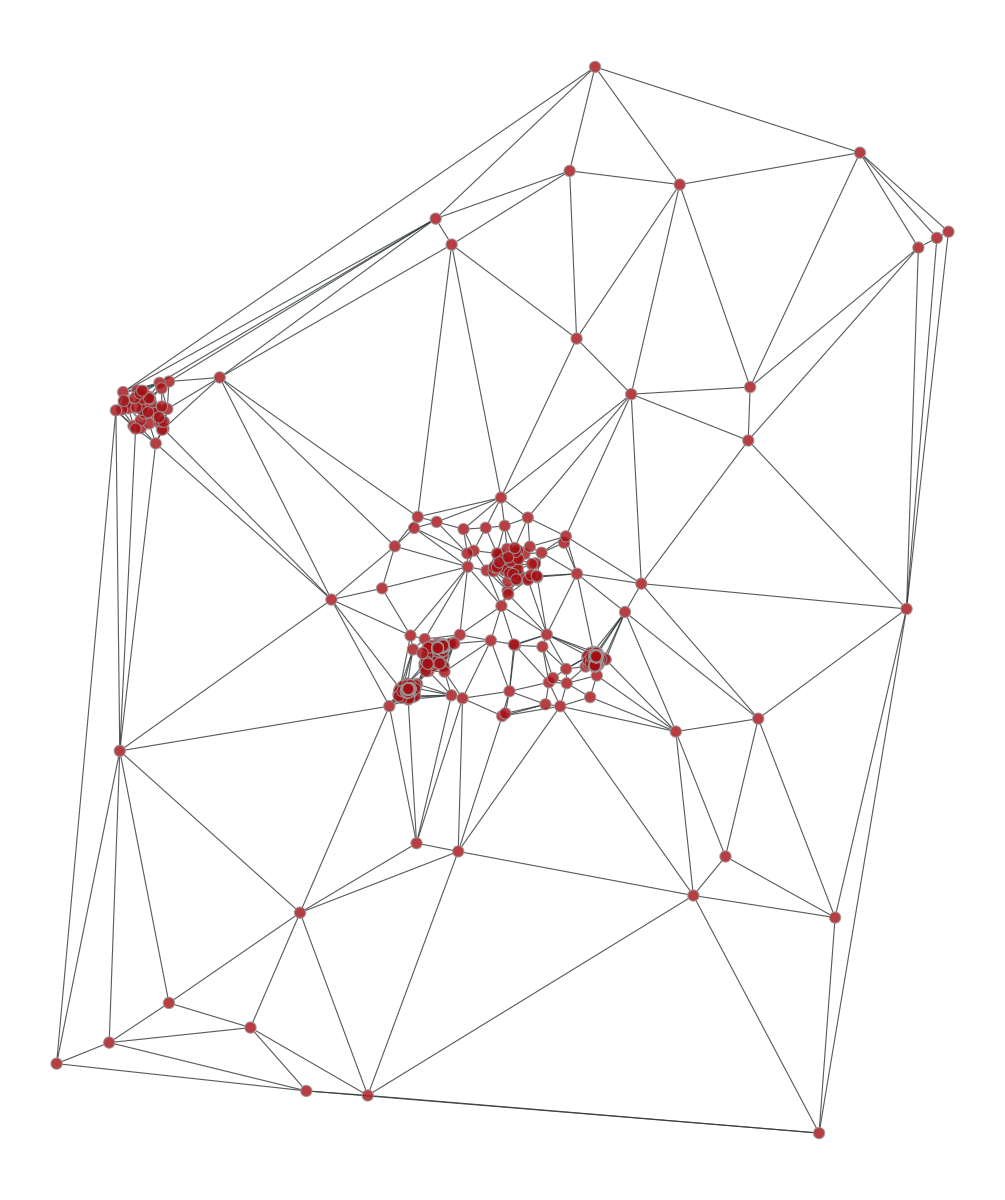

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62450>

In [39]:
graph_draw(g, pos=pos)

In [40]:
g.set_edge_filter(prop =  g.edge_properties['level_1'])
# g.set_edge_filter(None) ## Recover the graph

In [41]:
v0= g.vertex(0)
v0.in_degree() + v0.out_degree()

1

In [42]:
level_1_r = g.new_vertex_property("bool", False)
g.vertex_properties["level_1_r"] = level_1_r

In [43]:
for vert in g.vertices():
    if vert.in_degree() + vert.out_degree()> 0:
        g.vertex_properties['level_1_r'][vert]= True
    else: 
        g.vertex_properties['level_1_r'][vert]= False

In [44]:
g.set_vertex_filter(prop =  g.vertex_properties['level_1_r'])

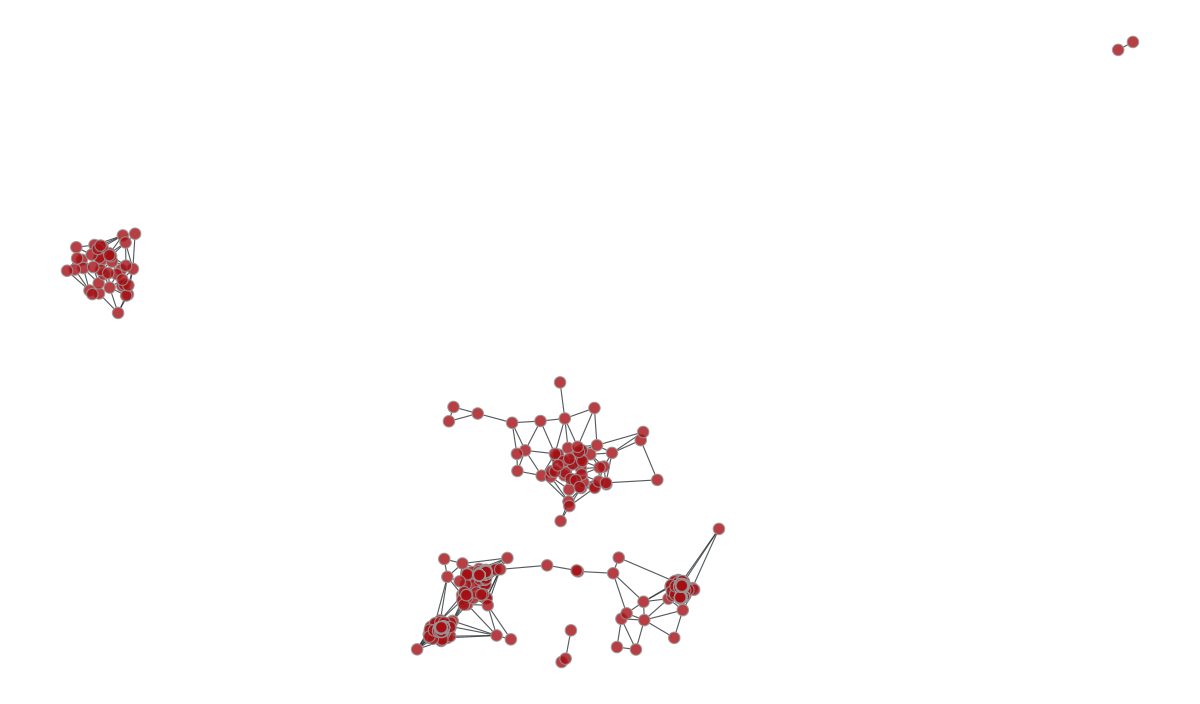

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62450>

In [45]:
graph_draw(g, pos=pos)

Exctract the connected commponents 

In [46]:
res_comm_num, comp_hist = label_components(g)

In [47]:
res_comm_num.a

PropertyArray([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
               3, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
               3, 0, 3, 3, 2, 2, 3, 3, 0, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3,
               2, 2, 3, 3, 3, 2, 3, 3, 0, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
               2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 3, 3

In [48]:
comp_hist

array([  3,   2,  59, 782,  41], dtype=uint64)

In [49]:
len(res_comm_num.a)

920

I think that the problem is that the result array of the components function put the value 0 as default, so the component 0 is not visible. To se if we can obtain the component I will create a new vertex property and assing as -1 all the non conected vertices an those wit a degree the corresponding connected label.  

In [50]:
g.set_vertex_filter(None) ## Recover the graph

In [51]:
compo_level_1 = g.new_vertex_property("int", -1)
g.vertex_properties["compo_level_1"] = compo_level_1

In [52]:
g.set_vertex_filter(prop =  g.vertex_properties['level_1_r'])

In [53]:
compo_level_res_1 = g.new_vertex_property("int", -1)
compo_level_res_1.a = res_comm_num.a
g.vertex_properties["compo_level_res_1"] = compo_level_res_1

In [54]:
for vert in g.vertices():
    # print(num)
    if vert.in_degree() + vert.out_degree()> 0:
        g.vertex_properties['compo_level_1'][vert]= g.vertex_properties["compo_level_res_1"][vert] 
    else: 
        print('No edge')
        g.vertex_properties['compo_level_1'][vert]= -1

In [98]:
g.set_vertex_filter(None) ## Recover the graph


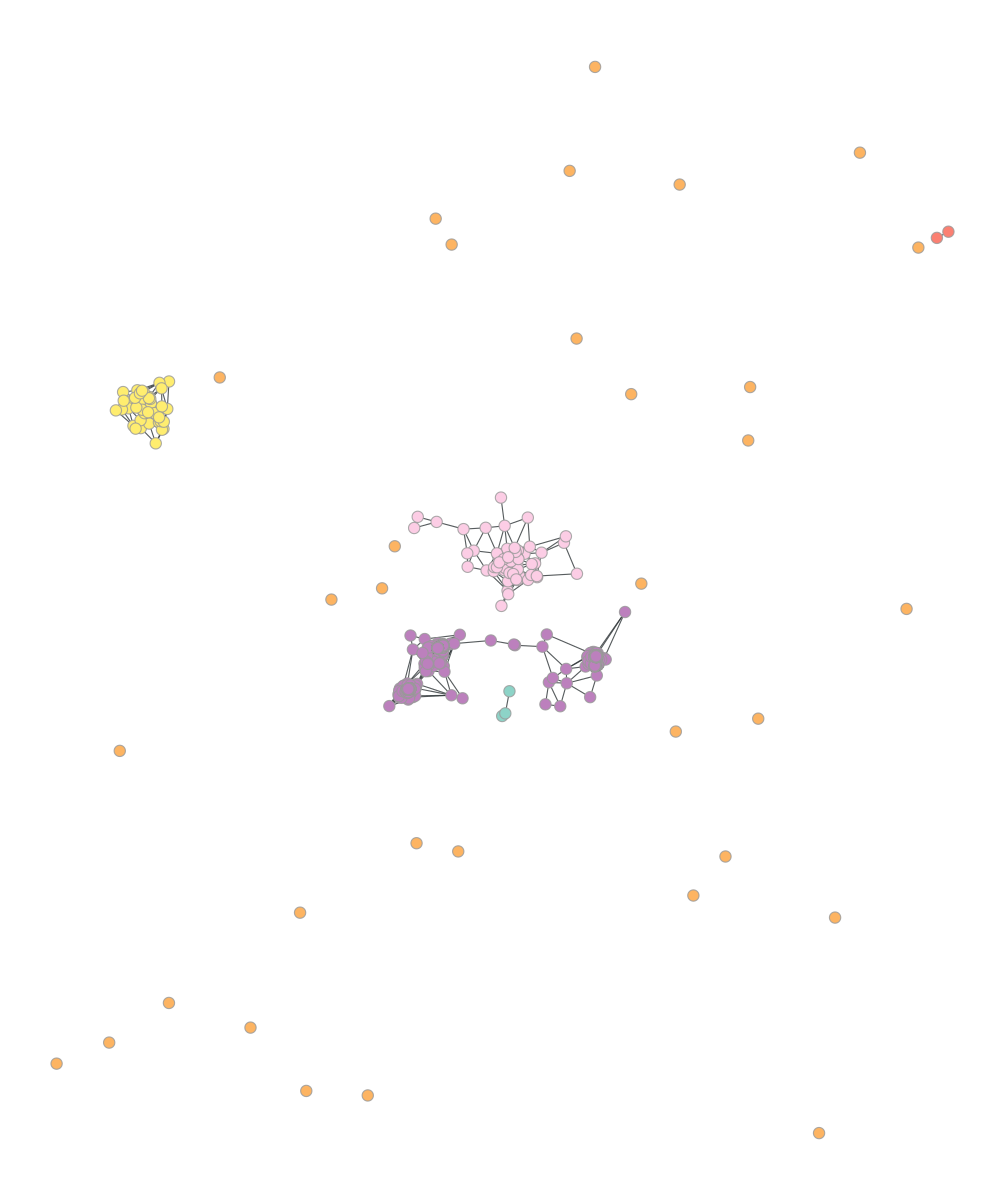

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62450>

In [99]:
graph_draw(g, pos =g.vertex_properties['pos'], vertex_fill_color = g.vertex_properties['compo_level_1'])

Now that we have all the clusters for the level 1 we can select each connected component and pass it like a cluster. 

In [80]:
dic_bool_arr={}
for i in np.nan_to_num(np.unique(g.vertex_properties['compo_level_1'].a)):
    dic_bool_arr[i]= g.vertex_properties['compo_level_1'].a == i

In [96]:
clusters_result= np.nan_to_num(np.unique(g.vertex_properties['compo_level_1'].a))
for clus_num in clusters_result:
    clus_i_dic = g.new_vertex_property("int", -1)
    clus_i_dic.a = dic_bool_arr[clus_num]
    if clus_num == -1:
        g.vertex_properties["level_1_clus_"+ 'noise'] = clus_i_dic
    else:
        g.vertex_properties["level_1_clus_"+ str(clus_num)] = clus_i_dic
        
    
                               

In [113]:
g.properties

{('e',
  'dis'): <EdgePropertyMap object with value type 'double', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62c50>,
 ('v',
  'pos'): <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c8ef55490, at 0x7f9d3ce62450>,
 ('e',
  'level_1'): <EdgePropertyMap object with value type 'bool', for Graph 0x7f9c8ef55490, at 0x7f9d3cbbea10>,
 ('v',
  'level_1_r'): <VertexPropertyMap object with value type 'bool', for Graph 0x7f9c8ef55490, at 0x7f9c8f2c8c50>,
 ('v',
  'compo_level_1'): <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f9c8ef55490, at 0x7f9d3cb05610>,
 ('v',
  'compo_level_res_1'): <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f9c8ef55490, at 0x7f9d3cb0a410>,
 ('v',
  'level_1_clus_noise'): <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f9c8ef55490, at 0x7f9c6a8cb110>,
 ('v',
  'level_1_clus_0'): <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f9c8ef55490, at 0x7f9c6a8cb0d0>,
 ('v',
  'level_

In [103]:
g.set_vertex_filter(None) ## Recover the graph
g.set_edge_filter(None)

In [107]:
l1_2=GraphView(g, vfilt=  g.vertex_properties['level_1_clus_2'] )

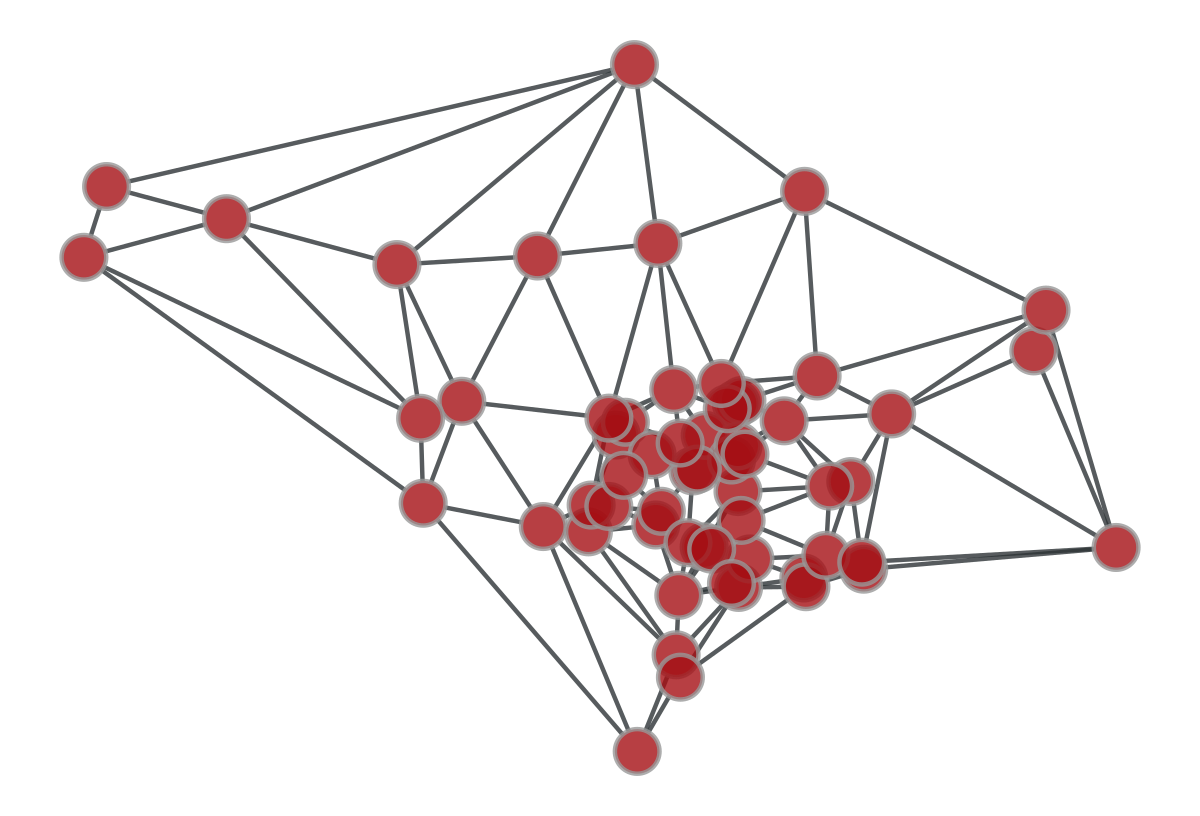

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c6ae9b690, at 0x7f9c6aea53d0>

In [108]:
graph_draw(l1_2, pos =l1_2.vertex_properties['pos'],)

Now we have to iterate through the levels until there is no more to iterate (check the stop conditions) And we have to pass this to a form to obtain the clustering tree. 

In [167]:
clusters =[]
for clas in clusters_result :
    if clas != -1:
        clas_mask = ( g.vertex_properties['compo_level_1'].a == clas)
        clusters.append(X_2[clas_mask])
    else:
        clas_mask = ( g.vertex_properties['compo_level_1'].a == clas)
        noise_level= X_2[clas_mask]

In [168]:
clusters

[array([[0.47265973, 0.57656283],
        [0.47805738, 0.55818307],
        [0.47498726, 0.57459327]]),
 array([[0.80377582, 0.21719685],
        [0.79522659, 0.22178737]]),
 array([[0.47209754, 0.4948627 ],
        [0.47177342, 0.41449829],
        [0.41000667, 0.42876575],
        [0.40735232, 0.43704835],
        [0.45156779, 0.45389578],
        [0.51850159, 0.44799922],
        [0.42403366, 0.43252832],
        [0.52813335, 0.471001  ],
        [0.46042643, 0.43689654],
        [0.4611088 , 0.4685502 ],
        [0.50186786, 0.45537253],
        [0.47451119, 0.43542442],
        [0.44705494, 0.46582496],
        [0.47664927, 0.48355896],
        [0.51993383, 0.44322903],
        [0.44398136, 0.43789685],
        [0.47993256, 0.47092273],
        [0.49167682, 0.42933117],
        [0.44675308, 0.45588425],
        [0.48370422, 0.45418511],
        [0.49159323, 0.47457102],
        [0.47860979, 0.46204698],
        [0.48396185, 0.47567722],
        [0.4696423 , 0.45784028],
        [0

In [164]:
X_2[15]

array([0.44005604, 0.67704441])

In [166]:
g.vertex_properties['pos'][15][:]

array([0.44005604, 0.67704441, 0.        ])

In [170]:
noise_level

array([[0.43516309, 0.22674257],
       [0.77271706, 0.49708516],
       [0.78147546, 0.22897711],
       [0.63835344, 0.68080532],
       [0.60436029, 0.18221616],
       [0.66265821, 0.57852742],
       [0.70779143, 0.88603305],
       [0.52272557, 0.1720592 ],
       [0.71966949, 0.72612516],
       [0.3459543 , 0.49016131],
       [0.22540165, 0.7894803 ],
       [0.5415884 , 0.09492197],
       [0.44005604, 0.67704441],
       [0.65665306, 0.33246232],
       [0.60149917, 0.5880921 ],
       [0.14202679, 0.83449539],
       [0.61452974, 0.70975381],
       [0.32270157, 0.72247261],
       [0.56840661, 0.33774041],
       [0.42331416, 0.20751068],
       [0.26309897, 0.32535012],
       [0.40911827, 0.67094903],
       [0.18106493, 0.81887426],
       [0.2859089 , 0.80775917],
       [0.52787272, 0.29648815],
       [0.18891665, 0.60243343],
       [0.73812135, 0.1585452 ],
       [0.37293086, 0.85809543],
       [0.39298917, 0.45061938],
       [0.32730776, 0.85474648],
       [0.

So lets do a function that has the implementation by level. Later I can make the function using only the graph-tool libary and return all the subgraphs.  

In [ ]:
def compute_AMOEBA(points_array, **kwargs):
    """The function obtains the AMOEBA algorithm on level basis
    
    :param np.array points2_clusters: a (N,2) numpy array containing the obsevations
    
    :returns: list with numpy arrays for all the clusters obtained
    """
    
    scale_points= kwargs.get('scale_points',True)
    debugg = kwargs.get('verbose',False)
    ret_noise = kwargs.get('return_noise', True)
    if scale_points ==True:
        scaler = StandardScaler()
        points_arr = scaler.fit_transform(points_array)
    else:
        points_arr = points_array
    
    g, pos =triangulation(points_arr, "delaunay")
    dis = g.new_edge_property("double")
    g.edge_properties["dis"] = dis
    g.vertex_properties["pos"] = pos
    ### this probably shiould be as graph properties
    global_edge_mean= np.nan_to_num(g.edge_properties['dis'].get_array().mean())
    global_edge_std = np.nan_to_num(g.edge_properties['dis'].get_array().std() ) 
    
    all_remove_level =[]
    all_keep_level = []
    for vert in g.vertices():
        local_mean= np.mean([g.edge_properties['dis'][vo_edge]  for vo_edge in vert.out_edges()])
        g_tolerance = global_edge_std * (global_edge_mean/local_mean)
        rem_edg_loc = []
        keep_edg_loc = []
        for ed in vert.all_edges():
            if g.edge_properties['dis'][ed] > g_tolerance + global_edge_mean:
                rem_edg_loc.append(ed)
            else:
                keep_edg_loc.append(ed)
        all_keep_level.append(keep_edg_loc)
        all_remove_level.append(rem_edg_loc)
    
    all_remove_level_flat= []
    for _list in all_remove_level:
        all_remove_level_flat += _list
    all_keep_level_flat= []
    for _list in all_keep_level:
        all_keep_level_flat += _list
    level_n = g.new_edge_property("bool", True)
    g.edge_properties["level_n"] = level_n
    
    #### Probably not needed or can be reduce
    for i in all_remove_flat:
        g.edge_properties['level_n'][i]= False
    for i in all_keep_flat:
        g.edge_properties['level_n'][i]= True
        
    g.set_edge_filter(prop =  g.edge_properties['level_n'])
    
    
    level_components_arr, comp_hist = label_components(g)
    g.set_vertex_filter(None)
    g.vertex_properties["compo_level_n"] = g.new_vertex_property("int", -1)
    
    g.set_vertex_filter(prop =  g.vertex_properties['level_1_r'])
    g.vertex_properties["level_n_r"] = g.new_vertex_property("bool", False)
    
    
    compo_level_res_n = g.new_vertex_property("int", -1)
    compo_level_res_n.a = level_components_arr.a
    